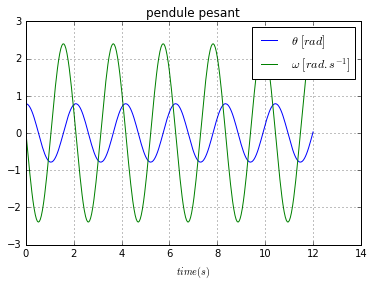

In [1]:
%matplotlib inline
import numpy as np
import math
from numpy import linalg as la
import matplotlib.pyplot as plt

def pendule(t,y):
    dy_dt = np.zeros(2)    # vecteur ligne

    # constantes
    g=9.81;
    L=1;

    # changement de variable pour garder les notations de l'equation
    teta =y[0]
    omega=y[1]

    dteta_dt  = omega;
    domega_dt = -g/L*math.sin(teta);

# changement de variable pour se conformer au vecteur de sortie dy
    dy_dt[0]=dteta_dt;
    dy_dt[1]=domega_dt;
    return dy_dt

def rkm(f, param, y0):
    AbsTol=1e-6
    # intervalle d'etude en temps et pas
    t0 = param[0];
    tf = param[1];
    h  = param[2];

    n=1
    tvec = np.array([t0])
    yvec = np.array([y0])
    
    t=t0
    y=y0
    
    while t<tf:  
        k1=f(t, y)
        k2=f(t+h/3., y+h/3.*k1)
        k3=f(t+h/3., y+h/6.*k1+h/6.*k2)
        k4=f(t+h/2., y+h/8.*k1+3.*h/8.*k3)  
        k5=f(t+h,    y+h/2.*k1-3./2.*h*k3+2.*h*k4)  
    
        A1=y+h/2.*(k1-3.*k3+4.*k4)
        A2=y+h/6.*(k1+4.*k4+k5)
    
        E=(A1-A2)/5.
        norm_E=la.norm(E, np.inf);
    
        if norm_E>AbsTol: 
            h=0.9*(AbsTol/norm_E)**0.25*h;
        else: 
        # pas suivant    
            t=t+h 
            n=n+1
        
            y=A2-E 
            h=0.9*(AbsTol/norm_E)**0.25*h
# stockage    
            tvec = np.concatenate((tvec, [t]), axis=0)
            yvec = np.concatenate((yvec, [y]), axis=0)
    return tvec, yvec

T, Y = rkm(pendule,[0, 12, 0.1],[math.pi/4, 0])

f, ax = plt.subplots()
ax.plot(T, Y)
ax.grid()
ax.set_title('pendule pesant')
ax.legend([r"$\theta\ [rad]$", r"$\omega\ [rad.s^{-1}]$"])
plt.xlabel("$time (s)$")

theta=Y[:, 0]
#plt.plot(T, theta)